In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.2MB 114kB/s 


In [ ]:
# load example images
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 2.792s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#HEAD


In [ ]:
# list them
!ls -l

total 3508
-rw-r--r-- 1 root root   59898 Jun 16 22:36 chinese.jpg
-rw-r--r-- 1 root root   97910 Jun 16 22:36 easyocr_framework.jpeg
-rw-r--r-- 1 root root 1740957 Jun 16 22:36 english.png
-rw-r--r-- 1 root root  487995 Jun 16 22:36 example2.png
-rw-r--r-- 1 root root  127454 Jun 16 22:36 example3.png
-rw-r--r-- 1 root root  488641 Jun 16 22:36 example.png
-rw-r--r-- 1 root root  168376 Jun 16 22:36 french.jpg
-rw-r--r-- 1 root root   42159 Jun 16 22:36 japanese.jpg
-rw-r--r-- 1 root root  225531 Jun 16 22:36 korean.png
drwxr-xr-x 1 root root    4096 Jun 15 13:37 sample_data
-rw-r--r-- 1 root root   82229 Jun 16 22:36 thai.jpg
-rw-r--r-- 1 root root   34706 Jun 16 22:36 width_ths.png


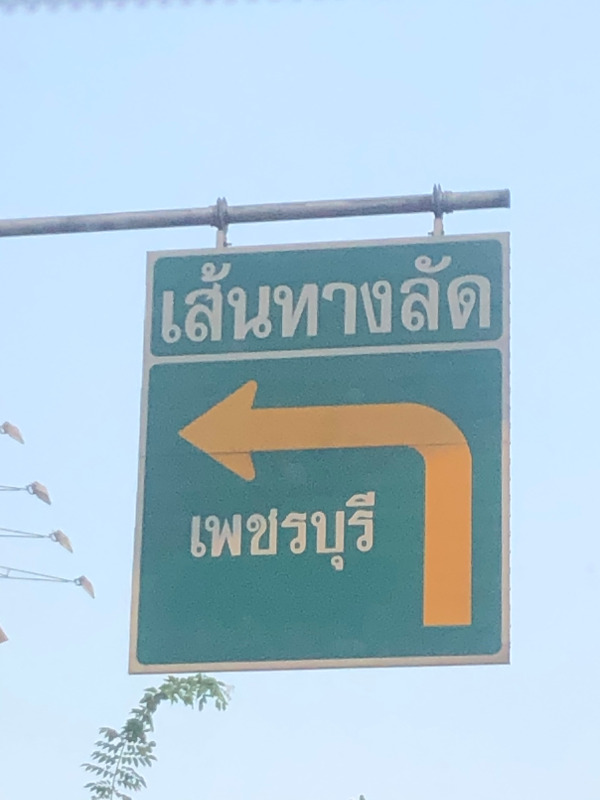

In [ ]:
# show an image
import PIL
from PIL import ImageDraw
im = PIL.Image.open("thai.jpg")
im

In [ ]:
# Create a reader to do OCR.
# If you change to GPU instance, it will be faster. But CPU is enough.
# (by MENU > Runtime > Change runtime type > GPU, then redo from beginning )
import easyocr
reader = easyocr.Reader(['th','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [ ]:
# Doing OCR. Get bounding boxes.
bounds = reader.readtext('thai.jpg')
bounds

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[142, 232], [500, 232], [500, 361], [142, 361]],
  'เส้นทางลัด',
  0.5458776426550863),
 ([[177, 483], [385, 483], [385, 573], [177, 573]],
  'เพชรบุรี',
  0.8813348319724021)]

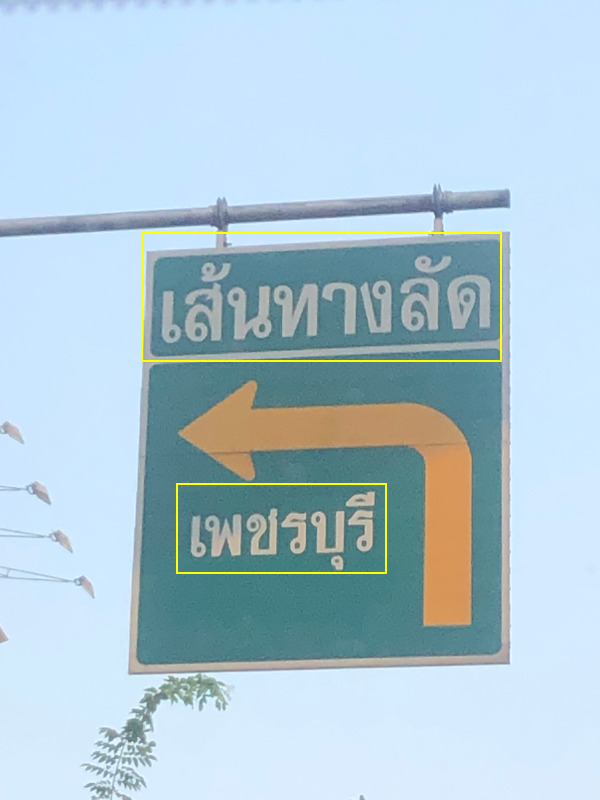

In [ ]:
# Draw bounding boxes
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)